In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(r'E:\project_dataset\credit_risk.csv')
data.head(4)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length,result
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,3,Y
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,2,N
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,3,N
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,2,N


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Cred_length     32581 non-null  int64  
 11  result          32581 non-null  object 
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [51]:
data.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Cred_length          0
result               0
dtype: int64

In [53]:
data.shape

(32581, 12)

In [29]:
data = data.dropna()

In [31]:
data.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Cred_length       0
result            0
dtype: int64

In [59]:
data.shape

(28638, 12)

In [82]:
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,28638.000000,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,16292.246456,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,9387.237677,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8159.500000,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16283.500000,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24434.750000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<function matplotlib.pyplot.show(close=None, block=None)>

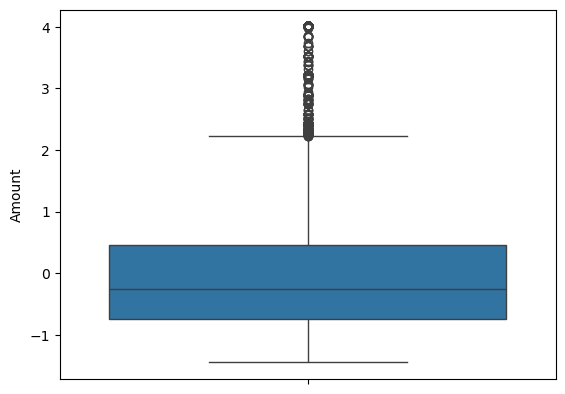

In [126]:
sns.boxplot(data=data['Amount'])
plt.show

C:\Users\Rezaul\AppData\Local\Temp\ipykernel_15600\2542859830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])


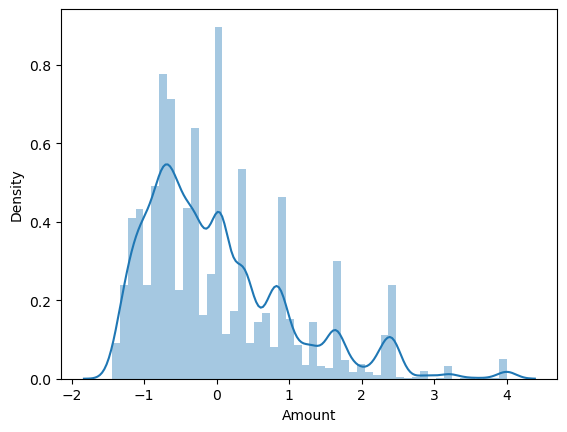

In [128]:
sns.distplot(data['Amount'])
plt.show()

C:\Users\Rezaul\AppData\Local\Temp\ipykernel_15600\110988480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Emp_length'])


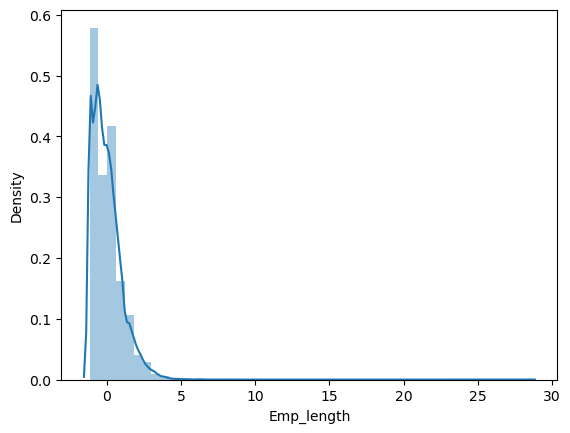

In [130]:
sns.distplot(data['Emp_length'])
plt.show()

In [33]:
q1=data['Emp_length'].quantile(0.25)
q3=data['Emp_length'].quantile(.75)
IQR=q3-q1
min_rang=q1-(1.5*IQR)
max_rang=q3+(1.5*IQR)
min_rang , max_rang
data1=data[data['Emp_length']<=max_rang]
data1

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length,result
1,-1.731890,-1.060904,-0.911147,2,0.050769,1,-1.358650,0.039595,-0.528243,-0.657458,-0.938167,0
2,-1.731784,-0.430783,-0.911147,0,-0.914816,3,-0.646849,0.573479,1.893069,3.744110,-0.691554,0
3,-1.731677,-0.745843,-0.009274,3,-0.190627,3,4.019404,1.301784,1.893069,3.369508,-0.938167,0
4,-1.731571,-0.588313,-0.188358,3,0.774958,3,4.019404,1.005524,1.893069,3.556809,-0.444942,1
5,-1.731465,-1.060904,-0.906307,2,-0.673420,5,-1.121383,-1.194818,1.893069,0.747297,-0.938167,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1.731570,4.610190,-0.210945,0,-0.914816,4,-0.599395,0.662974,-0.528243,-0.563808,5.966992,0
32577,1.731676,4.137599,0.870011,0,-0.190627,4,1.271060,-1.086807,-0.528243,-0.189207,3.254251,0
32578,1.731782,5.870433,0.160129,3,-0.432024,2,4.019404,-0.006695,1.893069,2.713956,5.473767,0
32579,1.731889,4.452660,1.354021,0,0.050769,4,0.855843,0.144521,-0.528243,-0.657458,4.980541,0


C:\Users\Rezaul\AppData\Local\Temp\ipykernel_15600\4033118949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Emp_length'])


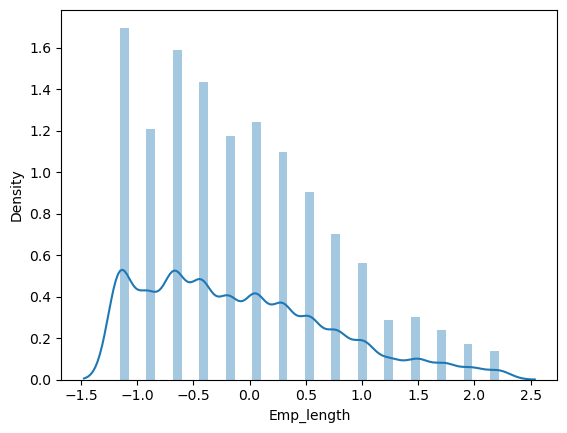

In [241]:
sns.distplot(data1['Emp_length'])
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [9]:
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length,result
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,3,1
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,2,0
2,2,25,9600,0,1.0,3,5500,12.87,1,0.57,3,0
3,3,23,65500,3,4.0,3,35000,15.23,1,0.53,2,0
4,4,24,54400,3,8.0,3,35000,14.27,1,0.55,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,5800,13.16,0,0.11,30,0
32577,32577,54,120000,0,4.0,4,17625,7.49,0,0.15,19,0
32578,32578,65,76000,3,3.0,2,35000,10.99,1,0.46,28,0
32579,32579,56,150000,0,5.0,4,15000,11.48,0,0.10,26,0


In [41]:
x=data.drop(columns=['result' , 'Id'])
y=data['result']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [110]:
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length,result
0,-1.735604,-0.907594,-0.122674,3,28.453433,4,4.003984,1.542164,1.901788,3.952527,-0.691791,1
1,-1.735498,-1.066064,-0.914907,2,0.050866,1,-1.367627,0.031008,-0.525821,-0.653141,-0.939413,0
2,-1.735391,-0.432183,-0.914907,0,-0.911932,3,-0.656678,0.566725,1.901788,3.764540,-0.691791,0
3,-1.735285,-0.749123,-0.018433,3,-0.189833,3,4.003984,1.297530,1.901788,3.388567,-0.939413,0
4,-1.735178,-0.590653,-0.196445,3,0.772966,3,4.003984,1.000253,1.901788,3.576554,-0.444169,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1.734700,4.638867,-0.218897,0,-0.911932,4,-0.609282,0.656527,-0.525821,-0.559148,5.994006,0
32577,1.734806,4.163456,0.855590,0,-0.189833,4,1.258933,-1.099263,-0.525821,-0.183175,3.270163,0
32578,1.734913,5.906629,0.149957,3,-0.430533,2,4.003984,-0.015442,1.901788,2.730615,5.498762,0
32579,1.735019,4.480397,1.336704,0,0.050866,4,0.844213,0.136293,-0.525821,-0.653141,5.003517,0


In [43]:
# Initialize models
rf = RandomForestClassifier(n_estimators=100,  max_depth=7, random_state=42 )
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [45]:
rf.score(x_train, y_train)*100 , rf.score(x_test , y_test)*100

(86.35446812242392, 82.69053708439897)

# Now  I want to Emplementation using theLogistic tachnique i s below that : 

In [47]:
lr = LogisticRegression(max_iter=1000,C=10.0, random_state=42 ,  l1_ratio=.5)
lr.fit(x_train , y_train)

E:\Jupter\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [227]:
lr.score(x_train , y_train)*100 ,lr.score(x_test , y_test)*100

(82.37553626658685, 81.91340782122904)

In [233]:
dt=DecisionTreeClassifier(max_depth=10 ,random_state=42 )
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [237]:
dt.score(x_train, y_train)*100 , dt.score(x_test, y_test)*100

(86.26159832385514, 82.29748603351955)

In [245]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr) , ('dt' , dt)], voting='soft')
voting_clf.fit(X_train, y_train)

E:\Jupter\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=7,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(C=10.0, l1_ratio=0.5,
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=42))],
                 voting='soft')

In [247]:
voting_clf.score(x_train , y_train)*100 , voting_clf.score(x_test, y_test)*100

E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


(84.42582061259104, 82.18109869646183)

# Now I wnat to predict the whole result from the dataset : 

In [256]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
for model, name in zip([rf, lr, voting_clf], ['Random Forest', 'Logistic Regression','Decision Tress classification' ]):
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


Model: Random Forest
Accuracy: 82.20437616387338
Confusion Matrix:
 [[6738  320]
 [1209  325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      7058
           1       0.50      0.21      0.30      1534

    accuracy                           0.82      8592
   macro avg       0.68      0.58      0.60      8592
weighted avg       0.79      0.82      0.79      8592



Model: Logistic Regression
Accuracy: 81.9366852886406
Confusion Matrix:
 [[6579  479]
 [1073  461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      7058
           1       0.49      0.30      0.37      1534

    accuracy                           0.82      8592
   macro avg       0.68      0.62      0.63      8592
weighted avg       0.79      0.82      0.80      8592



Model: Decision Tress classification
Accuracy: 81.95996275605214
Confusion Matrix:
 [[6542  516]
 [

E:\Jupter\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# This prediction views for confution matrix 

E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


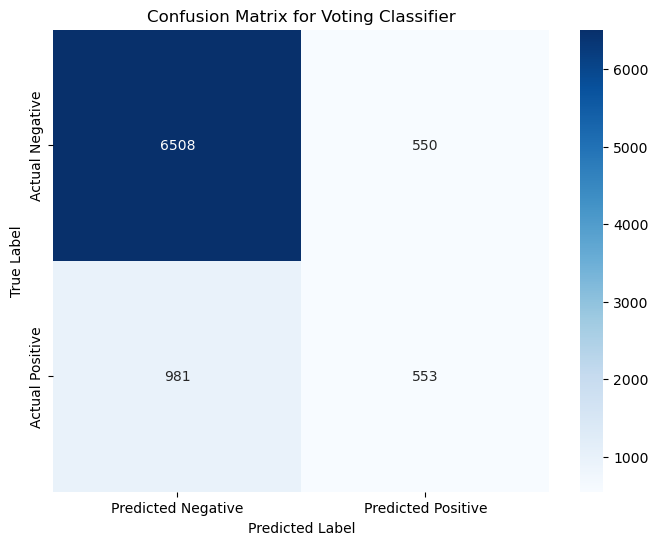

In [259]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = voting_clf.predict(x_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()


E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\Jupter\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


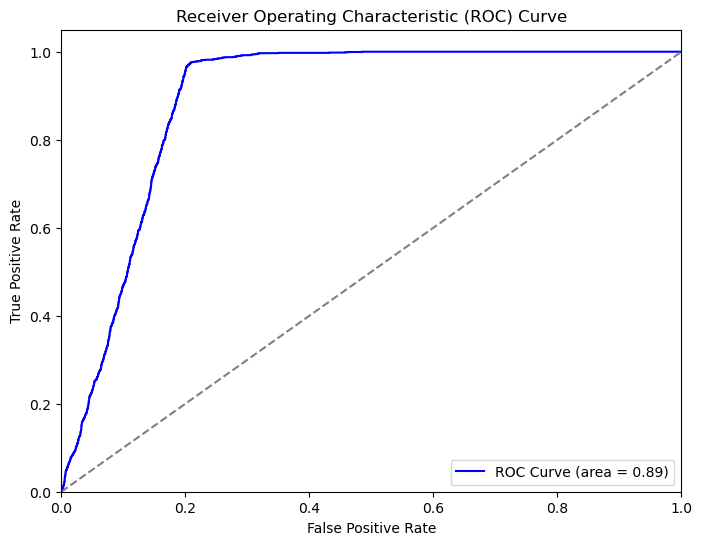

In [261]:
from sklearn.metrics import roc_curve, auc


y_pred_proba = voting_clf.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


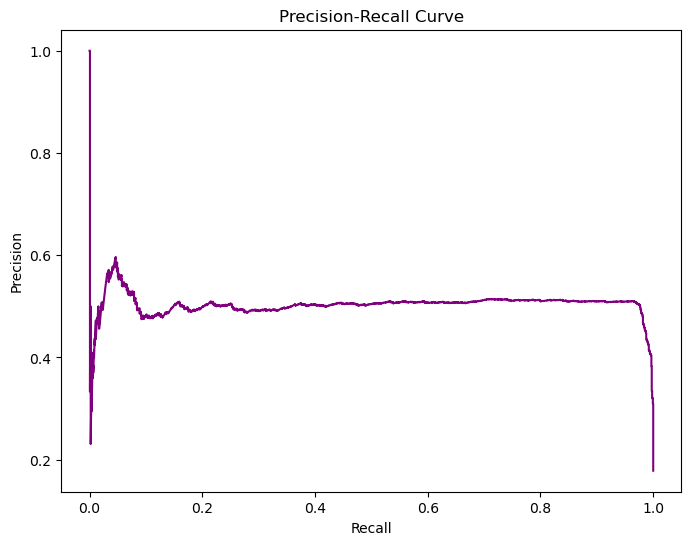

In [263]:
from sklearn.metrics import precision_recall_curve


precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
